In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [40]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
import pydotplus
from IPython.display import Image

In [41]:
df = pd.read_hdf("all_wind_clean.h5")    

In [42]:
df_test=df[(df.visual=="null") & (df.windPressure=='4.') &(df.trajectory__case!=0.0)]

In [43]:
# X = df.trajectory__servoAngle.values
# Y = df.trajectory__pOri_x.values

In [5]:
files = df_test.timeStamp.unique()

In [6]:
def print_structure(df):
    files = df.timeStamp.unique()
    for file in files:
        runs=df[df.timeStamp==file].trajectory__runNum.unique()
        for run in runs:
            case_=df[(df.timeStamp==file) & (df.trajectory__runNum==run)].trajectory__case.unique()
            #print(run,case_)
            for c in case_:
                s=df[(df.timeStamp==file) & (df.trajectory__runNum==run) & (df.trajectory__case==c)].shape
                print("F:",file,"_","R:",run,"_","C:",c,"_","S:",s)

In [7]:
next_orientation = df_test.trajectory__pOri_x.values[1:]
next_orientation=np.append(next_orientation,0)
next_orientation = pd.Series( next_orientation,index=df_test.index)
df_test=df_test.assign(next_orientation=next_orientation)
#df_test=df_test.join(next_orientation)
#df_test.loc[:,'next_orientation'] = next_orientation

In [8]:
idx=df_test.iloc[::2397,:].index
df_test=df_test.drop(index=idx)

In [9]:
df_test.shape

(79068, 22)

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV


In [11]:
X = df_test.trajectory__servoAngle.values
#Y = df_test.next_orientation.values
Y=df_test.trajectory__pOri_x.values

# Parameter setting

In [21]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]


random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [22]:
rf = RandomForestRegressor()

In [28]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 20, 
                               cv = 3, verbose=2, 
                               random_state=42, 
                               n_jobs = -1)
rf_random.fit(X.reshape(-1,1), Y)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_depth=50 
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_depth=50 
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_depth=50 
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=1, max_depth=70 
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=1, max_depth=70 
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=1, max_depth=70 
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_depth=90 
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_depth=90 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_depth=90, total=  10.5s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_depth=90 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_depth=90, total=  13.2s
[CV] n_estimators=1800, min_samples_split=5, min

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.7min


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_depth=None, total=  25.3s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_depth=None, total=  23.0s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=2, max_depth=70, total=  11.0s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_depth=110, total=  22.5s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_depth=80 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=2, max_depth=70, total=  11.8s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_depth=80 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_depth=110, total=  24.2s
[CV] n_estimators=1000, min_samples_split=

[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  4.2min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

# trainig with single time series

In [61]:
# df[(df.timeStamp=="2018-03-28__15~49~36") & 
#    (df.trajectory__runNum==3) & (df.trajectory__case==3)]

In [45]:
df3=df_test[(df_test.timeStamp=="2018-03-28__15~49~36") & 
            (df_test.trajectory__runNum==3) & 
            (df_test.trajectory__case==2)]

In [47]:
servo=df3.trajectory__servoAngle.values
#next_ori=df3.next_orientation.values
wbad=df3.trajectory__wbad

In [48]:
rf_best2=RandomForestRegressor(n_estimators=400,min_samples_split=5
                             ,min_samples_leaf=1,
                             max_depth=90)
rf_best2.fit(servo.reshape(-1,1), wbad)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=90,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [51]:
y=rf_best2.predict(servo.reshape(-1,1))

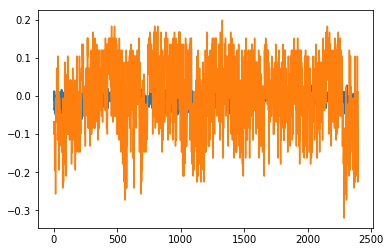

In [59]:
plt.plot(y)
plt.plot(wbad.values)

In [104]:
rf_random2 = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 20, 
                               cv = 3, verbose=2, 
                               random_state=42, 
                               n_jobs = -1)
rf_random2.fit(servo.reshape(-1,1), next_ori)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_depth=50 
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_depth=50 
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_depth=50 
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=1, max_depth=70 
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=1, max_depth=70 
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_depth=90 
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=1, max_depth=70 
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_depth=90 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_depth=90, total=   0.9s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_depth=90 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_depth=90, total=   1.0s
[CV] n_estimators=1800, min_samples_split=5, min

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.6s


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_depth=None, total=   2.0s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=2, max_depth=70, total=   1.1s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_depth=110, total=   1.8s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_depth=80 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_depth=110, total=   1.7s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_depth=80 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=2, max_depth=70, total=   1.0s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_depth=80 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_depth=110, total=   2.0s
[CV] n_estimators=1800, min_samples_split

[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   19.4s finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [49]:
def plot_diff(df,model):
    files = df.timeStamp.unique()
    for file in files:
            runs=df[df.timeStamp==file].trajectory__runNum.unique()
            for run in runs:
                case_=df[(df.timeStamp==file) & (df.trajectory__runNum==run)].trajectory__case.unique()
                #print(run,case_)
                for c in case_:
                    df_=df[(df.timeStamp==file) & (df.trajectory__runNum==run) & (df.trajectory__case==c)]
                    #print("F:",file,"_","R:",run,"_","C:",c,"_","S:",s)
                    servo=df_.trajectory__servoAngle.values
                    wbad=df_.trajectory__wbad.values
                    y=model.predict(servo.reshape(-1,1))
                    fig=plt.figure()
                    plt.plot(wbad,label="actual")
                    plt.plot(y,label="model prediction")
                    plt.legend()
                    plt.title(file+"_c_"+str(c)+"_r_"+str(run))
                    #fig.savefig("time_series_plots/"+file+"_c_"+str(c)+"_r_"+str(run)+".jpeg",bbox_inches = 'tight')
                    #plt.close()
                    
        

/home/lsr/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


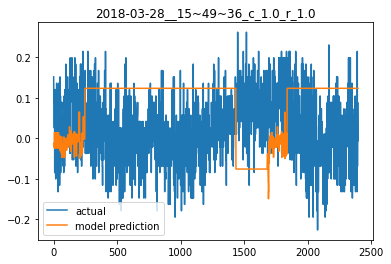

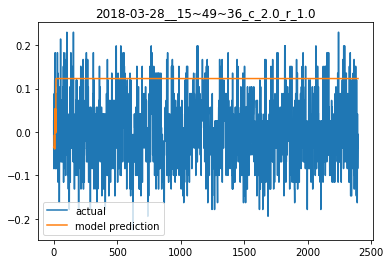

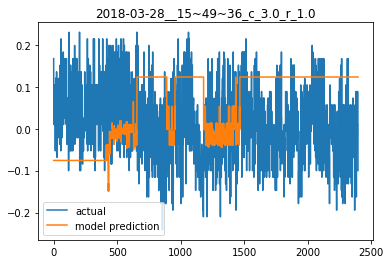

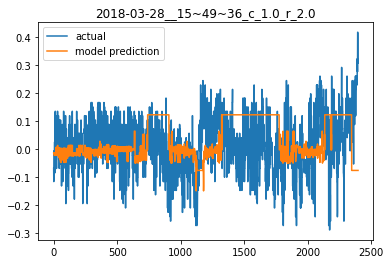

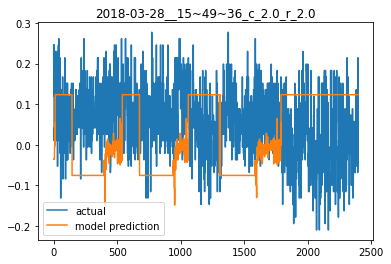

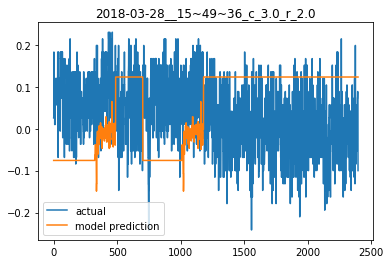

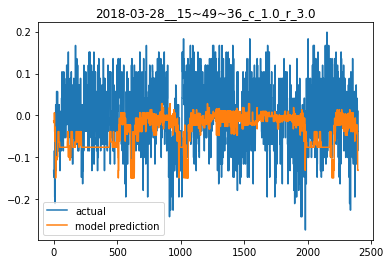

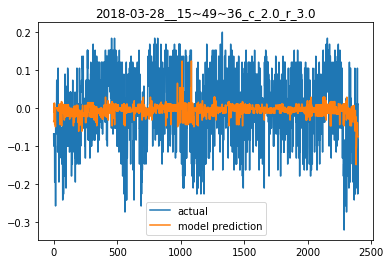

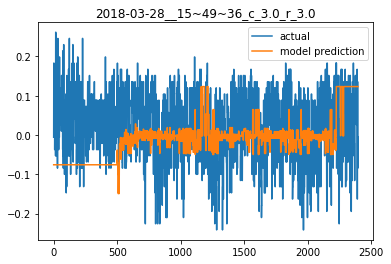

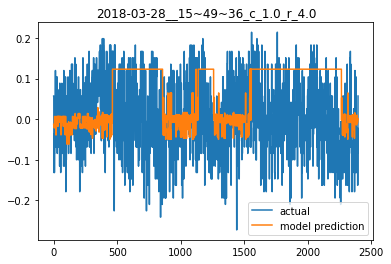

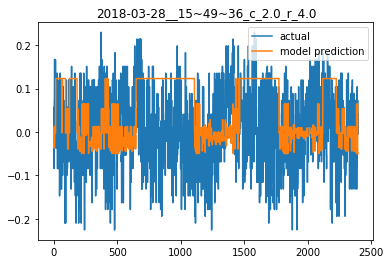

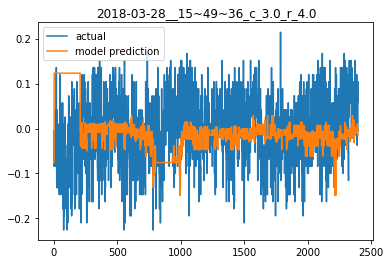

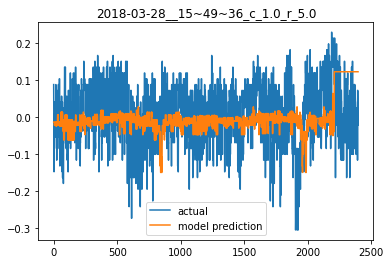

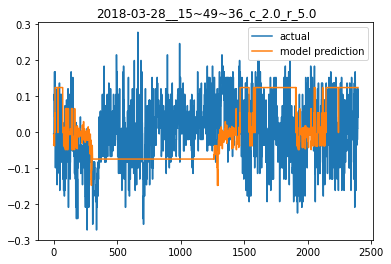

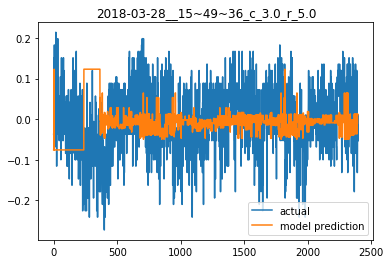

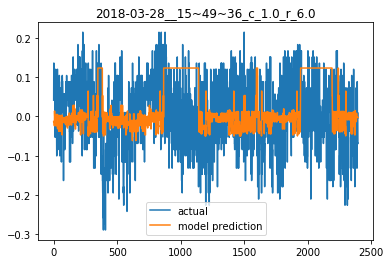

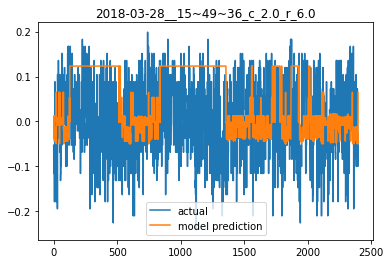

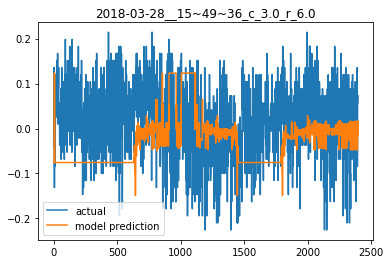

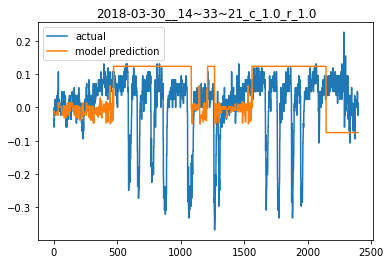

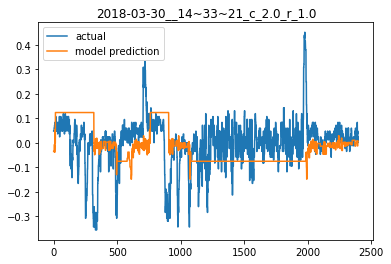

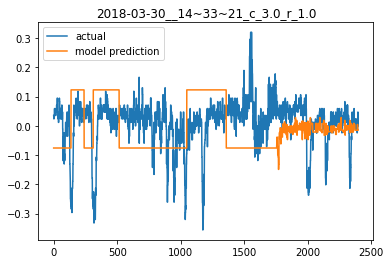

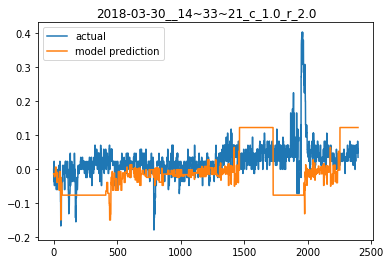

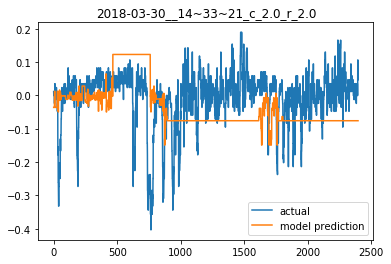

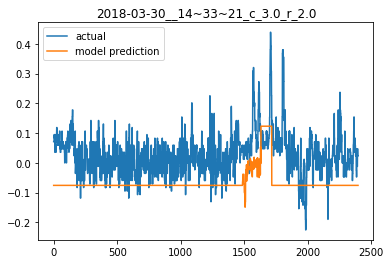

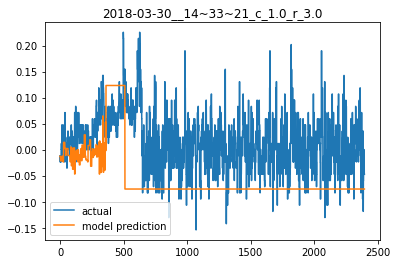

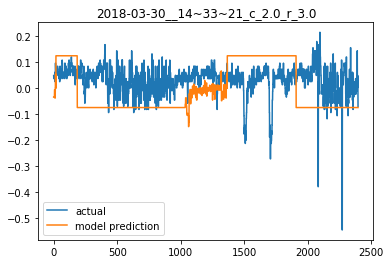

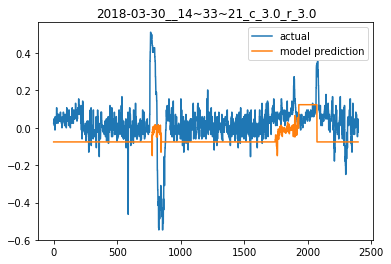

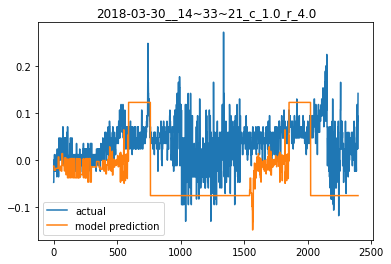

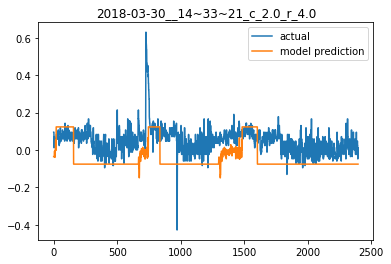

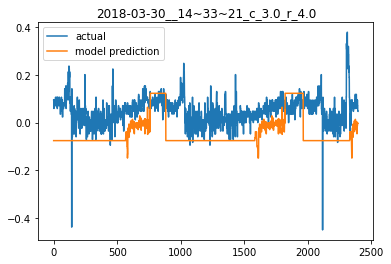

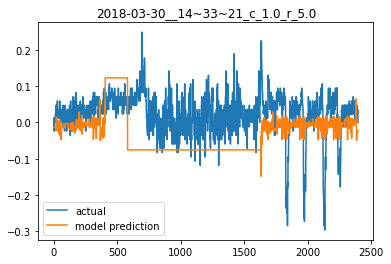

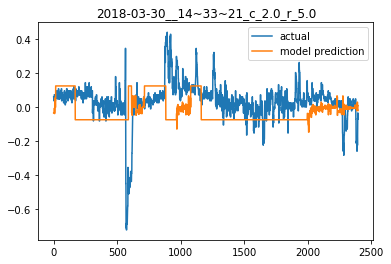

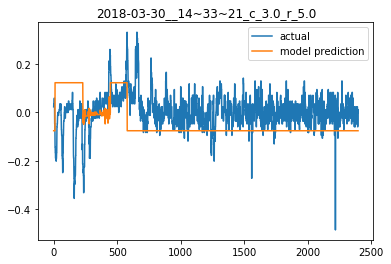

In [50]:
plot_diff(df_test,rf_best2)

In [107]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [80, 90, 100, 110],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000,1200]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [108]:
grid_search.fit(servo.reshape(-1,1), next_ori)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV] max_depth=80, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV] max_depth=80, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV] max_depth=80, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV] max_depth=80, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV] max_depth=80, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV] max_depth=80, min_samples_leaf=3, min_samples_split=8, n_estimators=300 
[CV] max_depth=80, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV] max_depth=80, min_samples_leaf=3, min_samples_split=8, n_estimators=300 
[CV]  max_depth=80, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] max_depth=80, min_samples_leaf=3, min_samples_split=8, n_estimators=300 
[CV]  max_depth=80, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] max_depth=80, min_samples_leaf=3, min_sample

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.1s


[CV]  max_depth=80, min_samples_leaf=3, min_samples_split=12, n_estimators=200, total=   0.6s
[CV] max_depth=80, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 
[CV]  max_depth=80, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=   0.8s
[CV] max_depth=80, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 
[CV]  max_depth=80, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=   0.8s
[CV] max_depth=80, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=80, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=   0.8s
[CV] max_depth=80, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=80, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   0.3s
[CV] max_depth=80, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=80, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] max_depth=80, min_samples_leaf=4, min_s

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   18.7s


[CV]  max_depth=90, min_samples_leaf=4, min_samples_split=8, n_estimators=300, total=   0.7s
[CV]  max_depth=90, min_samples_leaf=4, min_samples_split=8, n_estimators=300, total=   0.6s
[CV] max_depth=90, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 
[CV] max_depth=90, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  max_depth=90, min_samples_leaf=4, min_samples_split=8, n_estimators=300, total=   0.7s
[CV] max_depth=90, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  max_depth=90, min_samples_leaf=4, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] max_depth=90, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  max_depth=90, min_samples_leaf=4, min_samples_split=10, n_estimators=100, total=   0.3s
[CV] max_depth=90, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  max_depth=90, min_samples_leaf=3, min_samples_split=12, n_estimators=1000, total=   2.3s
[CV]  max_depth=90, min_samples_leaf=3, min

[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   44.9s


[CV]  max_depth=110, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=   0.7s
[CV] max_depth=110, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 
[CV]  max_depth=110, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=   0.6s
[CV] max_depth=110, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=110, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=   0.8s
[CV] max_depth=110, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=110, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] max_depth=110, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=110, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] max_depth=110, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  max_depth=110, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   2.1s
[CV] max_depth=110, min_samples_le

[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:   56.5s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [80, 90, 100, 110], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12], 'n_estimators': [100, 200, 300, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [110]:
grid_search.best_params_

{'max_depth': 80,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [111]:
rf_random2.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': None}

/home/lsr/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


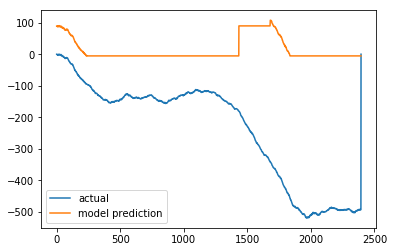

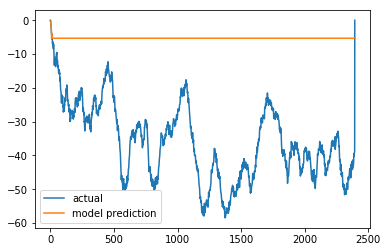

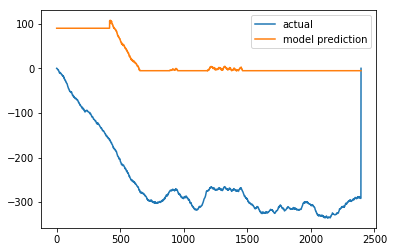

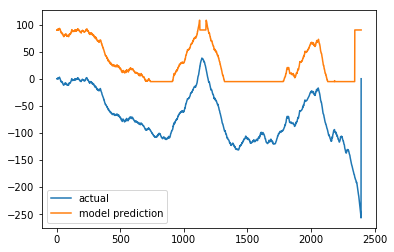

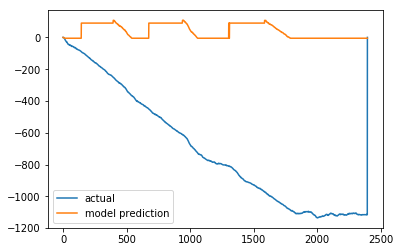

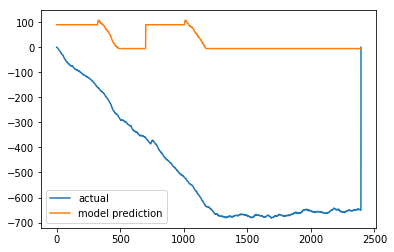

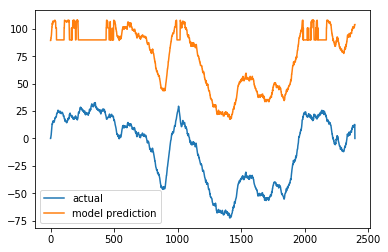

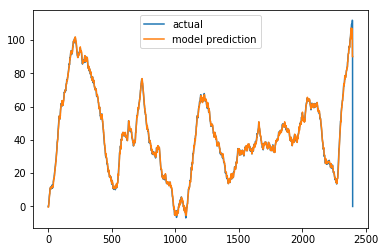

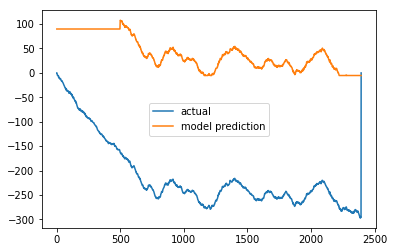

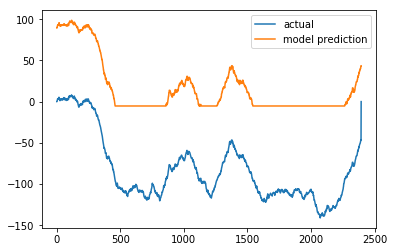

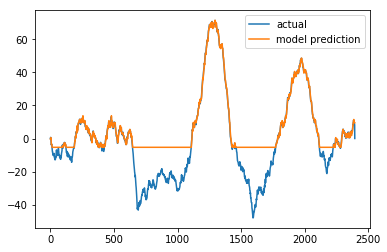

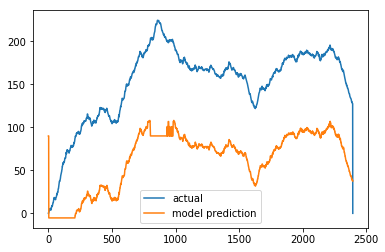

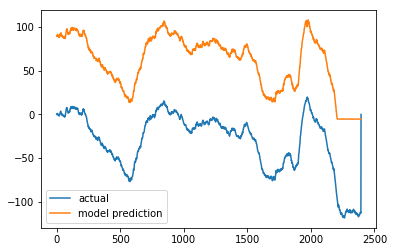

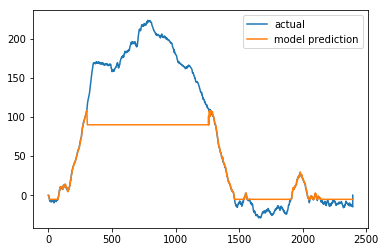

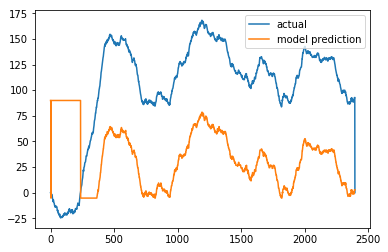

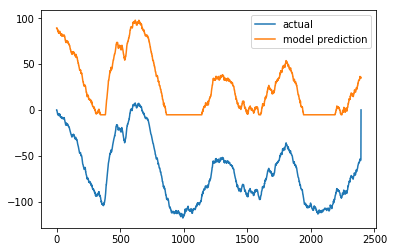

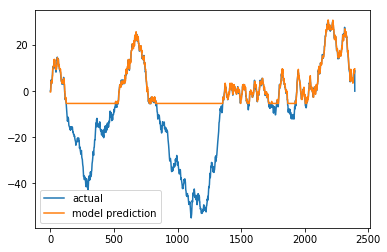

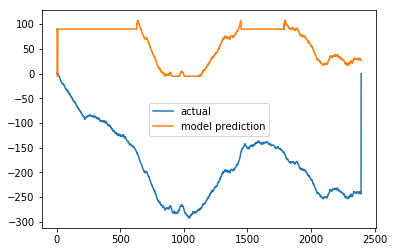

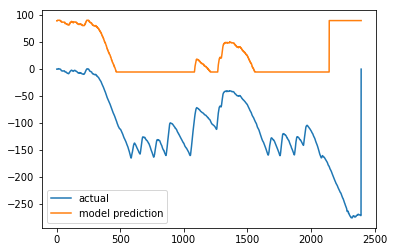

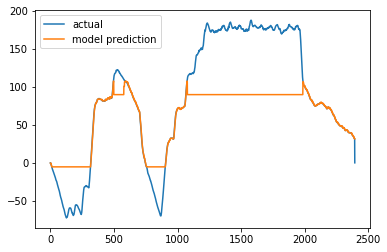

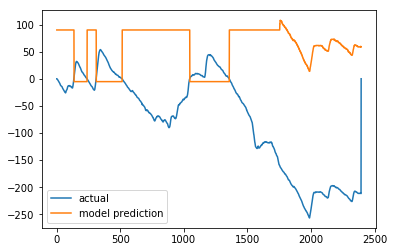

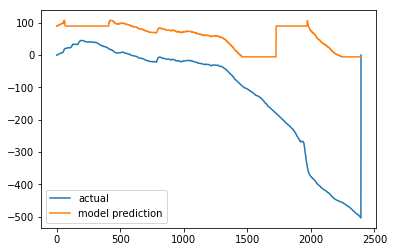

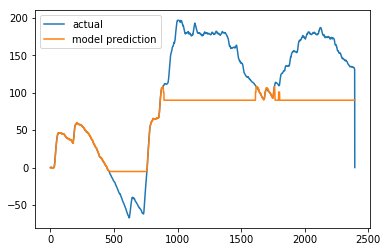

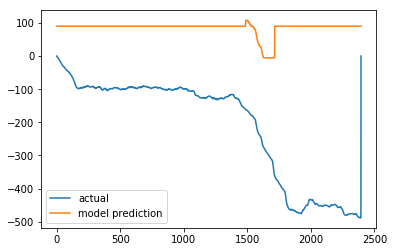

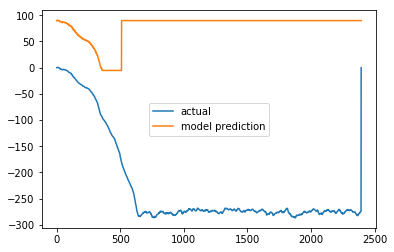

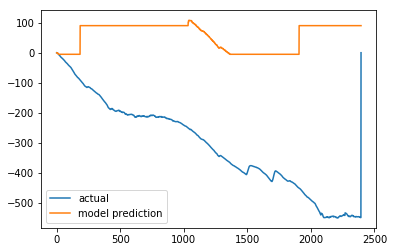

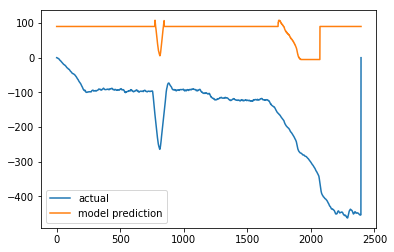

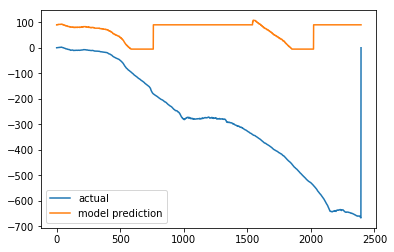

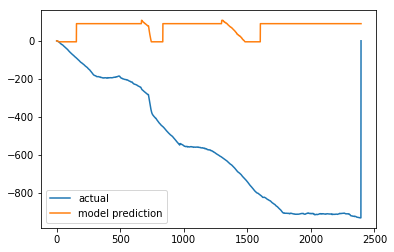

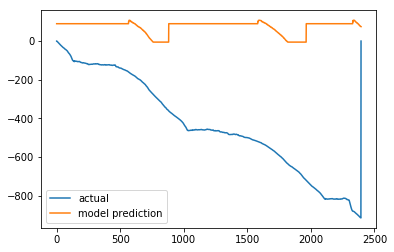

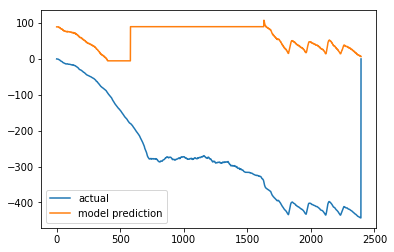

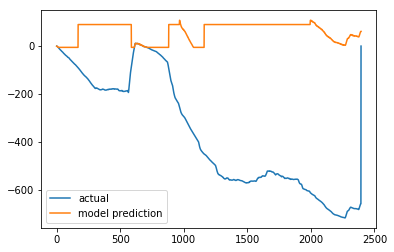

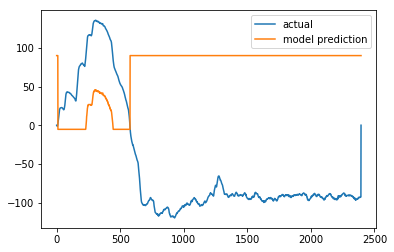

In [112]:
plot_diff(df_test,grid_search.best_estimator_)

# draw tree from RF

In [113]:
from sklearn.tree import export_graphviz

In [137]:
rf_random2.best_estimator_.fit(servo.reshape(-1,1),next_ori)
est=rf_random2.best_estimator_.estimators_[1]

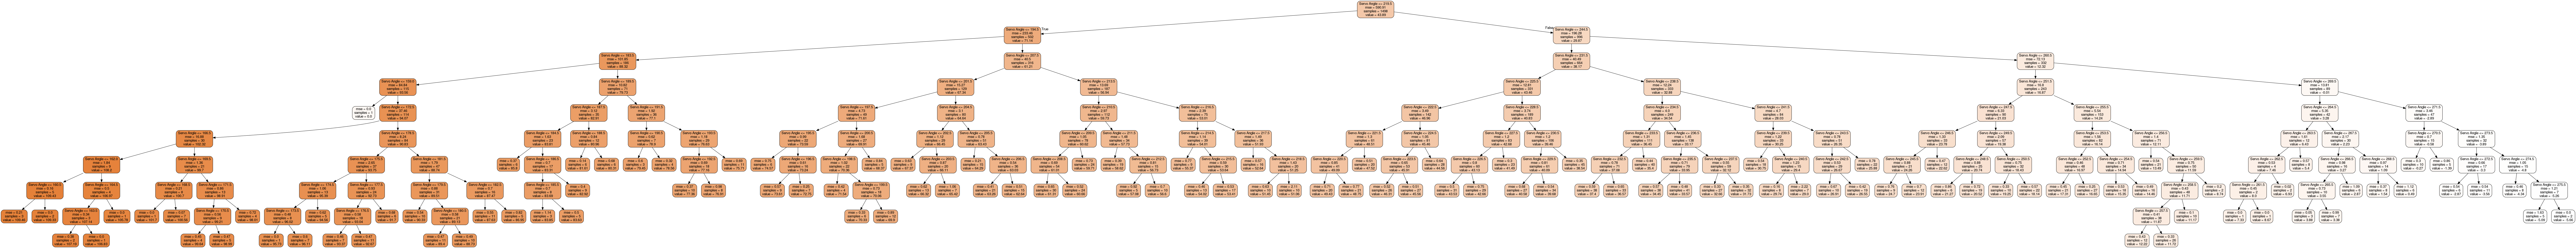

In [138]:
from sklearn.externals.six import StringIO  

dot_data = StringIO()
export_graphviz(est,out_file=dot_data,
                feature_names = ["Servo Angle"],
                class_names = ["Next orientation"],
                rounded = True, proportion = False, 
                precision = 2, filled = True
               )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
# from subprocess import call
# call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

In [152]:
from sklearn import tree

tr = DecisionTreeRegressor(max_depth=4)
tr.fit(servo.reshape(-1,1),next_ori)



DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

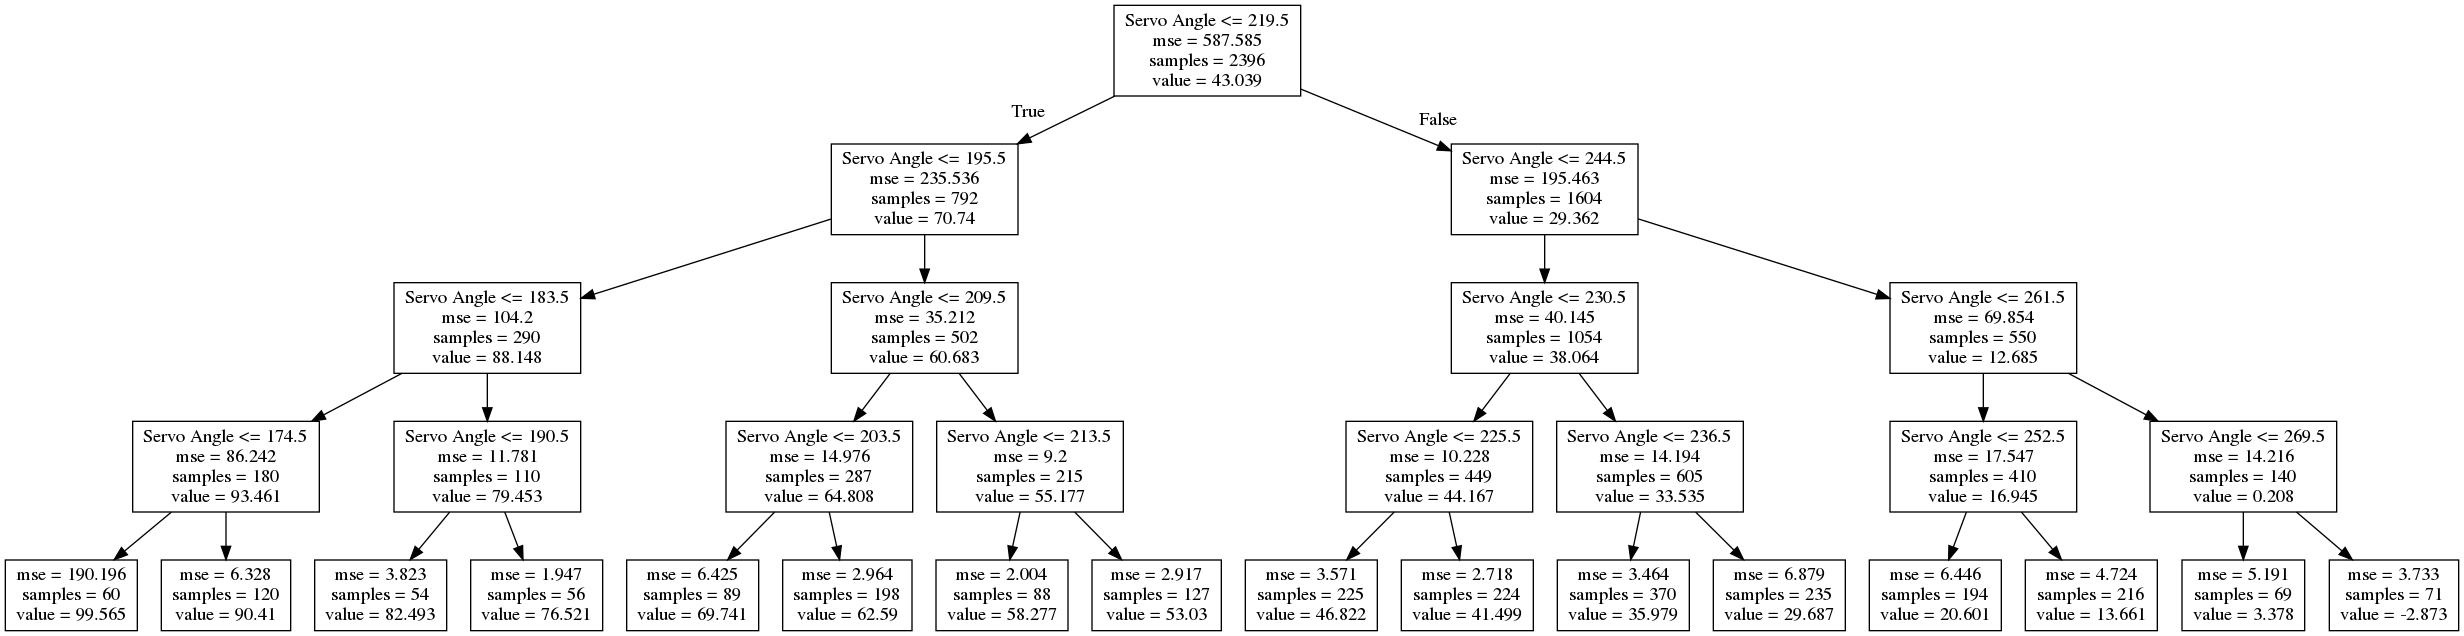

In [153]:
dot_data = tree.export_graphviz(tr, out_file=None, 
                                feature_names=["Servo Angle"],  
                                class_names=["Next orientation"])
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [154]:
graph.write_png("D.png")

True

In [ ]:
df